# Edge detection

## 1. How are Edges Detected

Ta detec edge dựa trên sự chênh lệch bất thường (lớn) tại giữa các vùng ảnh, làm nổi bật lên đường biên giữa 2 vùng cho ta kết quả là biên ảnh.

Với các ví dụ dưới đây, đầu tiên ta sẽ đọc ảnh vào và sử dụng `GaussianBlur()` để giảm noise của images.

Text(0.5, 1.0, 'Original Image')

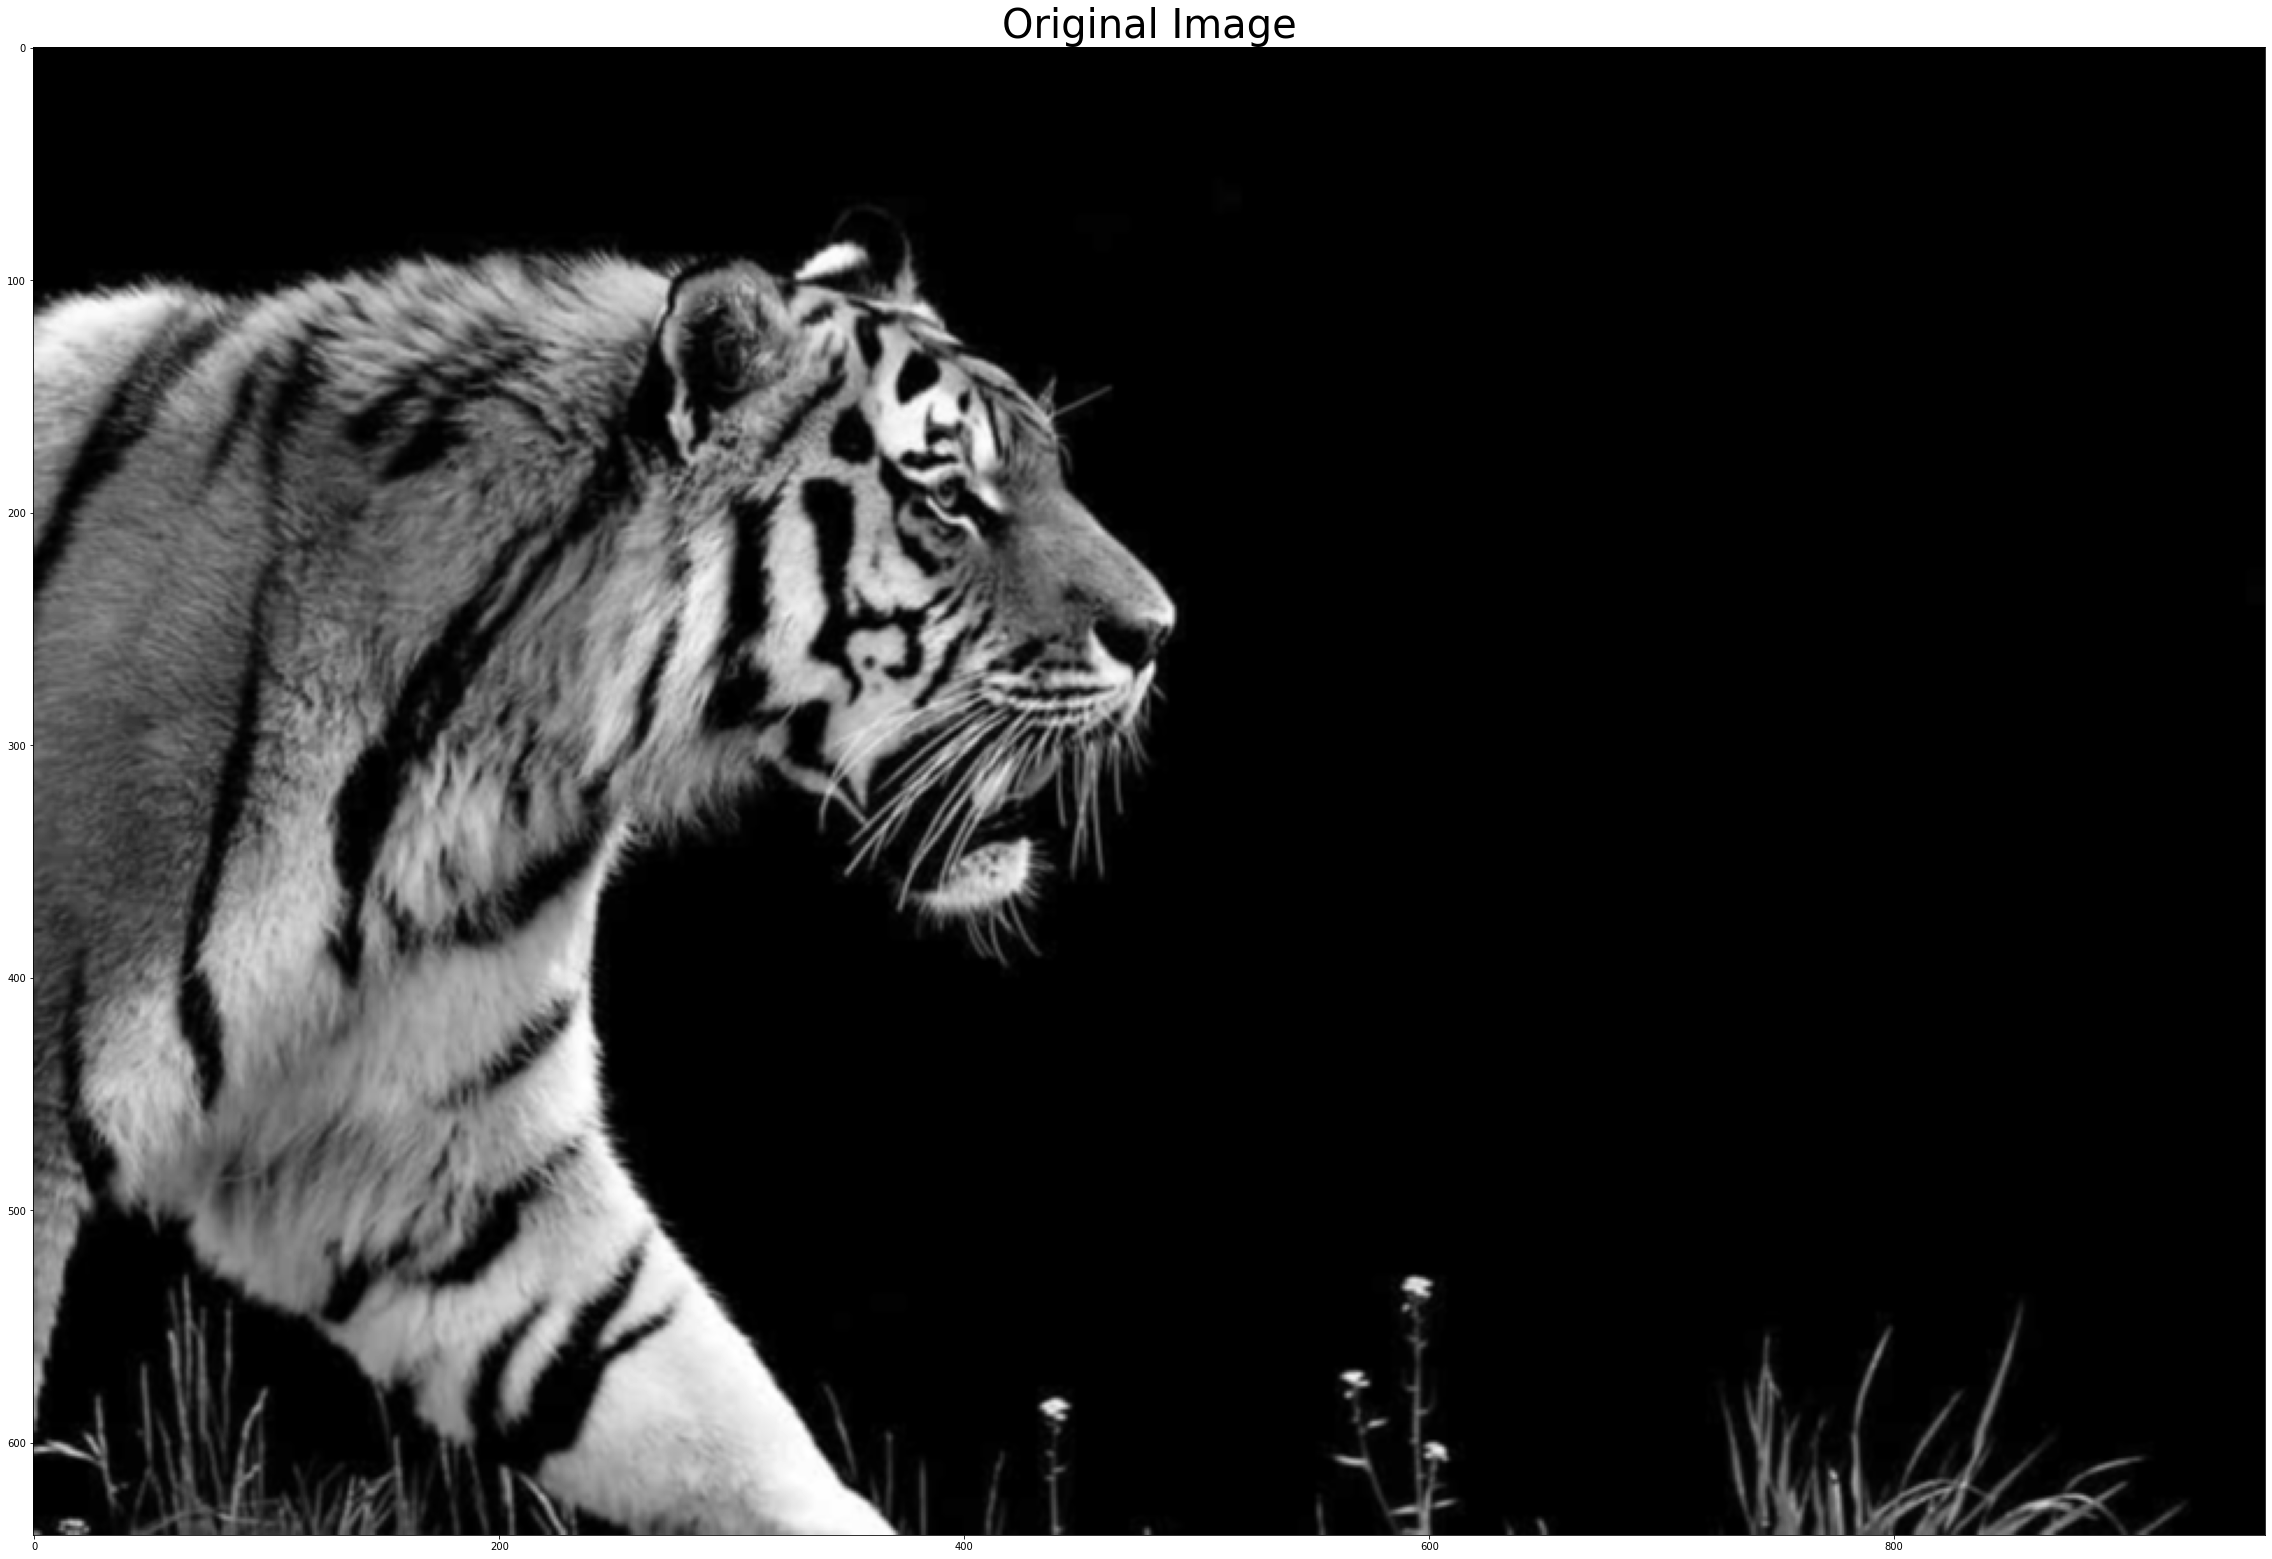

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("../assets/images/example_img_2.jpg", flags=0) # flags = 0 mean cv2.IMREAD_GRAYSCALE

# Aplly gaussian blur
img_blur = cv2.GaussianBlur(img, (3, 3), sigmaX=0, sigmaY=0)

plt.imshow(img_blur, cmap=plt.cm.gray)
plt.title("Original Image")

## 2. Sobel Edge Detection

Sobel Edge Detection is one of the most widely used algorithms for edge detection. The Sobel Operator detects edges that are marked by sudden changes in pixel intensity, as shown in the figure below.

![](../assets/images/sobel_1.png)

The rise in intensity is even more evident, when we plot the first derivative of the intensity function.

![](../assets/images/sobel_2.png)


Kernel sử dụng cho Sobel Edge Detection

![](../assets/images/sobel_3.png)

Apply 2 kernel này lên ảnh đầu vào ta được `Sobel edge image`

- Nếu như chỉ apply `vertical kernel` thì edge ở X-direction sẽ được làm nổi bật lên và tượng tự nếu chỉ apply `horizontal kernel`.

![](../assets/images/sobel_4.png)

**Syntax:**

```python
Sobel(src, ddepth, dx, dy)
```

Trong đó:

- `ddepth`
- `dx`, `dy` chỉ ra thứ tự apply các ma trận lên các direction:
    * `dx=1`, `dy=0`, thực hiện derivative Sobel image in x-direction
    * `dx=1`, `dy=1`, thực hiện cùng lúc



In [22]:
# Sobel Edge Detection in X Axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

# Sobel Edge Detection in Y Axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

# Sobel Edghe detection in both
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

# show image
# plt.rcParams['axes.titlesize'] = 40
# plt.rcParams['figure.figsize'] = (40, 40)

# plt.subplot(1,3,1)
# plt.imshow(sobelx)
# plt.title("Sobel in X Axis")

# plt.subplot(1,3,2)
# plt.imshow(sobely)
# plt.title("Sobel in Y Axis")

# plt.subplot(1,3,3)
# plt.imshow(sobelxy)
# plt.title("Sobel in both Axis")
cv2.imshow("sobelx", sobelx)
cv2.imshow("sobely", sobely)
cv2.imshow("sobelxy", sobelxy)

cv2.waitKey(0)


-1

## 3. Canny Edge Detection

### Calculating Intensity Gradient of the Image

![](../assets/images/canny_1.png)

### Supperssion of False Edges

![](../assets/images/canny_2.png)

### Hystersis Thresholding


In this final step of Canny Edge Detection, the gradient magnitudes are compared with two threshold values, one smaller than the other. 

- If the gradient magnitude value is higher than the larger threshold value, those pixels are associated with strong edges, and are included in the final edge map.
- If the gradient magnitude values are lower than the smaller threshold value, the pixels are suppressed, and excluded from the final edge map.
- All the other pixels, whose gradient magnitudes fall in between these two thresholds, are marked as ‘weak’ edges (i.e. they become candidates for being included in the final edge map). 
- If the ‘weak’ pixels are connected  to those associated with strong edges, then they too are included in the final edge map. 

Sử dụng hàm `Canny()`

**Syntax:**

```python
Canny(image, threshold1, threshold2)
```

Xem [chi tiết](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)

In [23]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)

# displat
cv2.imshow("canny edge detection", edges)
cv2.waitKey(0)

-1